In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline

In [76]:
data = pd.read_csv('car_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   car         1961 non-null   object 
 1   year        1961 non-null   int64  
 2   engine_hp   1961 non-null   float64
 3   avg_mpg     1961 non-null   float64
 4   price       1961 non-null   int64  
 5   salesman    1961 non-null   int64  
 6   dealership  1961 non-null   object 
 7   sold_date   1961 non-null   object 
 8   sold_month  1961 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 138.0+ KB


In [77]:
data.head()

,car,year,engine_hp,avg_mpg,price,salesman,dealership,sold_date,sold_month
0,Corvette,2011,335.0,22.5,46135,2,Big Bobs,2012-05-06,5
1,Corvette,2011,300.0,23.5,40650,2,Uptown Cars,2011-05-16,5
2,Corvette,2011,300.0,24.0,36350,2,Uptown Cars,2013-07-31,7
3,Corvette,2011,230.0,23.0,29450,2,Uptown Cars,2014-07-05,7
4,Corvette,2011,230.0,23.0,34500,2,Uptown Cars,2013-05-20,5


### Max month overall = May (5)

5     417
3     304
12    282
4     274
6      95
1      91
11     90
7      85
9      84
10     81
2      80
8      78
Name: sold_month, dtype: int64


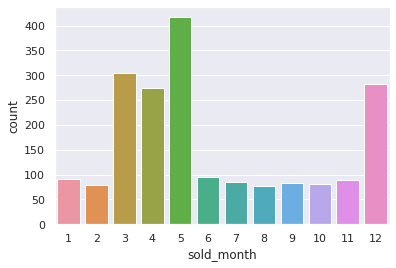

In [78]:
print(data.sold_month.value_counts())
ax = sns.countplot(x="sold_month", data=data)

### Max month for yearly average = May (5)

In [79]:
grouped_data = data.value_counts(subset=['year', 'sold_month']).reset_index().rename(columns={0: "count"})[['sold_month', 'count']]
grouped_data.groupby(['sold_month']).mean().sort_values(by=['count'], ascending=False)

,count
sold_month,
5,14.892857
4,10.960000
3,10.857143
12,10.071429
1,5.687500
6,4.750000
10,4.500000
8,4.333333
11,4.285714


### Salesman `3` sold the most

3    1054
2     513
4     304
1      90
Name: salesman, dtype: int64


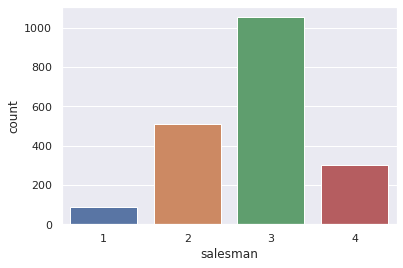

In [85]:
print(data.salesman.value_counts())
ax = sns.countplot(x="salesman", data=data)

### Dealership `Uptown Cars` sold the most

Uptown Cars    1012
Car Town        672
Big Bobs        277
Name: dealership, dtype: int64


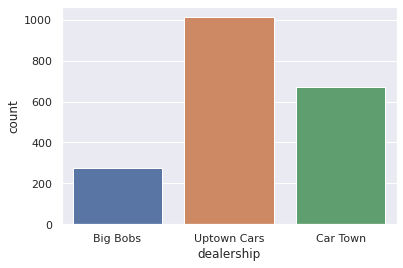

In [86]:
print(data.dealership.value_counts())
ax = sns.countplot(x="dealership", data=data)

### In `2005` the average price of a Corevette was > \$100k

   year     price
9  2005  102100.0


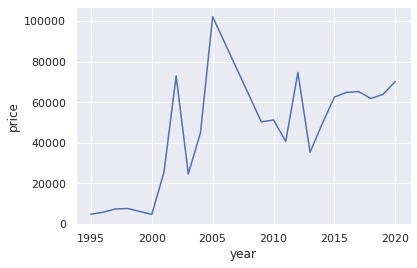

In [117]:
mean_data = data.loc[data.car=='Corvette', ['price', 'sold_date']]
mean_data['year'] = pd.DatetimeIndex(mean_data.sold_date).year

mean_data = mean_data[['price', 'year']].groupby(['year']).mean().reset_index()
print(mean_data[mean_data.price > 100000])
ax = sns.lineplot(data=mean_data, x="year", y="price")


### `Mustang ` has several points in the far right upper quartile for horsepower

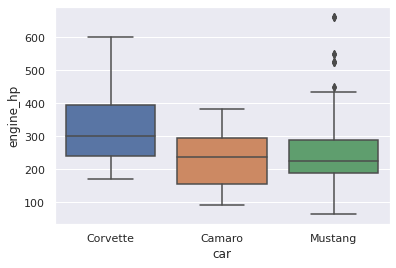

In [83]:
ax = sns.boxplot(y='engine_hp', x='car', data=data)